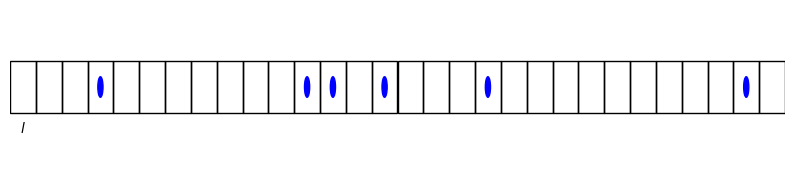

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
length = 30  # Length of the ribbon
l = 1        # Length of each cell
p = 0.2      # Probability of placing a ball in a cell

# Create the ribbon and divide it into cells
cells = np.arange(0, length + l, l)
num_cells = len(cells) - 1

# Randomly place balls in cells with probability p
balls = np.random.choice([0, 1], size=num_cells, p=[1-p, p])

# Re-plotting without title and with cell length labeled
fig, ax = plt.subplots(figsize=(10, 2))
for i in range(num_cells):
    rect = plt.Rectangle((i*l, 0), l, 0.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    if balls[i] == 1:
        circle = plt.Circle((i*l + l/2, 0.25), 0.1, color='blue')
        ax.add_patch(circle)

# Labeling the cell length
ax.text(0.5*l, -0.2, '$l$', ha='center')

# Formatting the plot
ax.set_xlim(0, length)
ax.set_ylim(-0.5, 1)
ax.axis('off')

plt.savefig("solutes-in-cells.png")
plt.show()


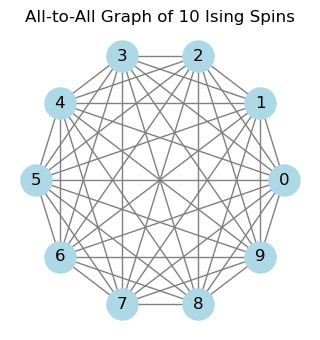

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
num_spins = 10  # Number of Ising spins

# Create an all-to-all graph
G = nx.complete_graph(num_spins)

# Plotting
plt.figure(figsize=(3, 3))
pos = nx.circular_layout(G)  # Position nodes in a circle
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')
plt.title('All-to-All Graph of 10 Ising Spins')
plt.savefig("all-to-all.png")
plt.show()


/var/folders/zz/1vw5bbc56354j3gzyyp8xx4m0000gn/T/ipykernel_21616/1622346267.py:6: RuntimeWarning: divide by zero encountered in log
  return -0.5 * beta_J * m**2 + 0.5 * (1 + m) * np.log((1 + m) / 2) + 0.5 * (1 - m) * np.log((1 - m) / 2)
/var/folders/zz/1vw5bbc56354j3gzyyp8xx4m0000gn/T/ipykernel_21616/1622346267.py:6: RuntimeWarning: invalid value encountered in multiply
  return -0.5 * beta_J * m**2 + 0.5 * (1 + m) * np.log((1 + m) / 2) + 0.5 * (1 - m) * np.log((1 - m) / 2)


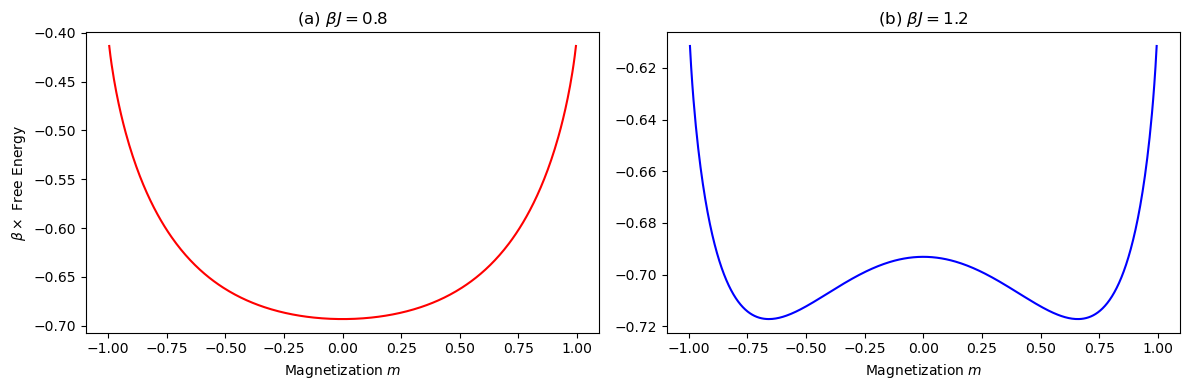

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Corrected free energy function based on the updated formula
def corrected_free_energy_m(m, beta_J):
    return -0.5 * beta_J * m**2 + 0.5 * (1 + m) * np.log((1 + m) / 2) + 0.5 * (1 - m) * np.log((1 - m) / 2)

# Magnetization range
m = np.linspace(-1, 1, 400)

# Calculate corrected free energy for beta*J = 1 and beta*J = -1
corrected_free_energy_beta_J_pos = corrected_free_energy_m(m, 0.8)
corrected_free_energy_beta_J_neg = corrected_free_energy_m(m, 1.2)

# Plotting corrected free energy
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Subfigure (a) - beta*J = 1
axs[0].plot(m, corrected_free_energy_beta_J_pos, 'r-')
axs[0].set_title(r'(a) $\beta J = 0.8$')
axs[0].set_xlabel('Magnetization $m$')
axs[0].set_ylabel(r'$\beta \times$ Free Energy')

# Subfigure (b) - beta*J = -1
axs[1].plot(m, corrected_free_energy_beta_J_neg, 'b-')
axs[1].set_title(r'(b) $\beta J = 1.2$')
axs[1].set_xlabel('Magnetization $m$')

plt.tight_layout()
plt.savefig('all-to-all-free-energy.png')
plt.show()


/var/folders/zz/1vw5bbc56354j3gzyyp8xx4m0000gn/T/ipykernel_21616/3634510022.py:12: RuntimeWarning: invalid value encountered in power
  M = np.where(T < T_c, (1 - np.sinh(2/T)**(-4))**(1/8), 0)


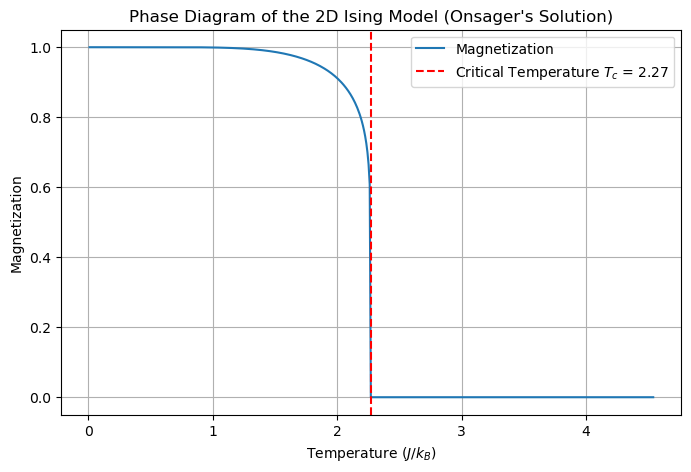

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Critical temperature calculation using Onsager's formula (J/k_B = 1)
T_c = 2 / np.log(1 + np.sqrt(2))  # Critical temperature

# Temperature range for the plot
T = np.linspace(0.01, 2*T_c, 500)  # Start from 0.01 to avoid division by zero at T=0

# Magnetization calculation using Onsager's solution
# The magnetization is non-zero below T_c and zero for T >= T_c
M = np.where(T < T_c, (1 - np.sinh(2/T)**(-4))**(1/8), 0)

# Plotting the phase diagram
plt.figure(figsize=(8, 5))
plt.plot(T, M, label='Magnetization')
plt.axvline(x=T_c, color='r', linestyle='--', label=f'Critical Temperature $T_c$ = {T_c:.2f}')
plt.xlabel('Temperature ($J/k_B$)')
plt.ylabel('Magnetization')
plt.title('Phase Diagram of the 2D Ising Model (Onsager\'s Solution)')
plt.legend()
plt.grid(True)
plt.savefig('2d-Ising-model.png')
plt.show()
